In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import matplotlib
import warnings
import pylab as pl
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier

In [21]:
df = pd.read_csv('finaldata.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_CURRENT_BALANCE,...,NO_OF_INQUIRIES,PERFORM_CNS_SCORE_DESCRIPTION,EMPLOYMENT_TYPE,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,LOAN_DEFAULT
0,0,0.000000,0.038125,0.013442,0.935860,0.000000,0.064710,0.00000,0.00000,0.015698,...,0.866213,0.231313,0.203458,0.048586,0.000236,0.24287,0.000077,0.143703,0.000232,0
1,1,0.000004,0.034612,0.017934,0.743792,0.671910,0.064978,0.00005,0.00005,0.015698,...,0.866213,0.272629,0.227657,0.048586,0.000236,0.24287,0.000030,0.143703,0.000232,1
2,2,0.000009,0.040888,0.015302,0.936801,0.000000,0.064710,0.00000,0.00000,0.015698,...,0.866213,0.231313,0.227657,0.048586,0.000236,0.24287,0.000202,0.143703,0.000232,0
3,3,0.000013,0.045222,0.018287,0.923267,0.342697,0.064710,0.00000,0.00000,0.015698,...,0.095581,0.280423,0.227657,0.048586,0.000236,0.24287,0.000064,0.143703,0.000232,1
4,4,0.000017,0.039967,0.014636,0.922208,0.000000,0.064710,0.00000,0.00000,0.015698,...,0.095581,0.231313,0.227657,0.048586,0.000236,0.24287,0.000060,0.143703,0.000232,1


In [22]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [23]:
df.head(1)

,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,...,NO_OF_INQUIRIES,PERFORM_CNS_SCORE_DESCRIPTION,EMPLOYMENT_TYPE,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,LOAN_DEFAULT
0,0.038125,0.013442,0.93586,0.0,0.06471,0.0,0.0,0.015698,0.0,0.0,...,0.866213,0.231313,0.203458,0.048586,0.000236,0.24287,0.000077,0.143703,0.000232,0


In [24]:
X = df.drop('LOAN_DEFAULT',axis=1)
y = df['LOAN_DEFAULT']

## SMOTE

In [25]:
sm = SMOTE(sampling_strategy = 1,k_neighbors = 5, random_state=1)
X_smote, y_smote = sm.fit_resample(X,y)


In [26]:
sm=SMOTE(random_state=10,sampling_strategy=0.25)

## LR without RFE

In [115]:
lr = LogisticRegression()
lr_model = lr.fit(X_sm_train,y_sm_train)

In [116]:
f1_score(y_sm_train,lr_model.predict(X_sm_train))

0.6153438582375855

In [117]:
f1_score(y_sm_test,lr_model.predict(X_sm_test))

0.6170746362235169

In [118]:
print('Recall: %.3f' % recall_score(y_sm_test,lr_model.predict(X_sm_test) ))

Recall: 0.645


## RF Without RFE

In [30]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_sm_train,y_sm_train)

In [31]:
f1_score(y_sm_train,rf_model.predict(X_sm_train))

0.9999588756605597

In [32]:
f1_score(y_sm_test,rf_model.predict(X_sm_test))

0.8370900295776085

In [34]:
print('Recall: %.3f' % recall_score(y_sm_test,rf_model.predict(X_sm_test) ))

Recall: 0.784


In [35]:
print('Recall: %.3f' % recall_score(y_sm_train,rf_model.predict(X_sm_train) ))

Recall: 1.000


## DT without RFE

In [36]:
dt = DecisionTreeClassifier(random_state=34)
model_dt = dt.fit(X_sm_train,y_sm_train)

In [37]:
f1_score(y_sm_train,model_dt.predict(X_sm_train))

0.9999588739692787

In [38]:
f1_score(y_sm_test,model_dt.predict(X_sm_test))

0.7600204995414577

In [41]:
print('Recall: %.3f' % recall_score(y_sm_test,model_dt.predict(X_sm_test) ))

Recall: 0.769


In [42]:
print('Recall: %.3f' % recall_score(y_sm_train,model_dt.predict(X_sm_train) ))

Recall: 1.000


## GB Without RFE

In [43]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(X_sm_train,y_sm_train)

In [44]:
f1_score(y_sm_train,gb_model.predict(X_sm_train))

0.7412776809928339

In [45]:
f1_score(y_sm_test,gb_model.predict(X_sm_test))

0.7417894193844213

In [46]:
print('Recall: %.3f' % recall_score(y_sm_train,gb_model.predict(X_sm_train) ))

Recall: 0.707


In [47]:
print('Recall: %.3f' % recall_score(y_sm_test,gb_model.predict(X_sm_test) ))

Recall: 0.706


## XGB without RFE

In [48]:
xgb = XGBClassifier()
xgb_model = xgb.fit(X_sm_train,y_sm_train)

[17:13:06] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
f1_score(y_sm_train,xgb_model.predict(X_sm_train))

0.8301388021856912

In [50]:
f1_score(y_sm_test,xgb_model.predict(X_sm_test))

0.8221577031199594

In [51]:
print(classification_report(y_sm_test,xgb_model.predict(X_sm_test)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     36374
           1       0.94      0.73      0.82     36644

    accuracy                           0.84     73018
   macro avg       0.86      0.84      0.84     73018
weighted avg       0.86      0.84      0.84     73018



In [52]:
print('Recall: %.3f' % recall_score(y_sm_train,xgb_model.predict(X_sm_train) ))

Recall: 0.738


In [53]:
print('Recall: %.3f' % recall_score(y_sm_test,xgb_model.predict(X_sm_test) ))

Recall: 0.730


## ADA without RFE

In [54]:
ada = AdaBoostClassifier()
ada_model = ada.fit(X_sm_train,y_sm_train)

In [55]:
f1_score(y_sm_train,ada_model.predict(X_sm_train))

0.6798558984913267

In [56]:
f1_score(y_sm_test,ada_model.predict(X_sm_test))

0.6835803635645687

In [57]:
print('Recall: %.3f' % recall_score(y_sm_train,ada_model.predict(X_sm_train) ))

Recall: 0.658


In [58]:
print('Recall: %.3f' % recall_score(y_sm_test,ada_model.predict(X_sm_test) ))

Recall: 0.661


## Stacking Classifier without RFE

In [120]:
base=[('Decision Tree',DecisionTreeClassifier(min_samples_leaf=3,max_depth=25,random_state=20)),
      ('Random Forest',RandomForestClassifier(random_state=20))]

In [ ]:
stack=StackingClassifier(estimators=base,final_estimator=GradientBoostingClassifier(random_state=20))
stack_model=stack.fit(X_sm_train,y_sm_train)

In [62]:
print(classification_report(y_sm_test,stack_model.predict(X_sm_test)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     36374
           1       0.91      0.77      0.84     36644

    accuracy                           0.85     73018
   macro avg       0.86      0.85      0.85     73018
weighted avg       0.86      0.85      0.85     73018



In [63]:
print(classification_report(y_sm_train,stack_model.predict(X_sm_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146169
           1       1.00      1.00      1.00    145899

    accuracy                           1.00    292068
   macro avg       1.00      1.00      1.00    292068
weighted avg       1.00      1.00      1.00    292068



In [64]:
print('Recall: %.3f' % recall_score(y_sm_test,stack_model.predict(X_sm_test) ))

Recall: 0.773


In [66]:
print('Recall: %.3f' % recall_score(y_sm_train ,stack_model.predict(X_sm_train) ))

Recall: 1.000


In [ ]:
lr = LogisticRegression()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
lr.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(lr.score(Xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(scaledXtest,ytest))
scoreslr = cross_val_score(lr, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoreslr))
predictedlr = lr.predict(scaledXtest)
print(confusion_matrix(ytest,predictedlr))
print(classification_report(ytest,predictedlr))

In [ ]:
cm=confusion_matrix(ytest,predictedlr)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted Attrition: No',
                                            'Predicted Attrition: Yes'],
                          index=['Actual Attrition: No',
                                'Actual Attrition: Yes'])
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap = matplotlib.colors.ListedColormap('lightskyblue'),cbar=False,
            linewidths = 0.1,annot_kws={'size':25})

plt.show()


In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(ytest,predictedlr)
plt.plot(fpr1, tpr1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.text(x=0.6,y=0.45,s=('AUC Score:',round(metrics.roc_auc_score(ytest,predictedlr),2)))
plt.grid(True)

In [ ]:
ROC = pd.DataFrame({'FPR':fpr1, 'TPR':tpr1, 'Thresholds':thresholds1})
ROC['Difference'] = ROC['TPR']-ROC['FPR']
ROC.sort_values(by='Difference', ascending=False).head()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
dt.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(dt.score(Xtrain,ytrain))
print("Testing Accuracy")
print(dt.score(scaledXtest,ytest))
scoresdt = cross_val_score(dt, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresdt))
predicted_dt = dt.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_dt))
print(classification_report(ytest,predicted_dt))

In [ ]:
cm=confusion_matrix(ytest,predicted_dt)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted Attrition: No',
                                            'Predicted Attrition: Yes'],
                          index=['Actual Attrition: No',
                                'Actual Attrition: Yes'])
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap = matplotlib.colors.ListedColormap('lightskyblue'),cbar=False,
            linewidths = 0.1,annot_kws={'size':25})

plt.show()


In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(ytest,predicted_dt)
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.text(x=0.6,y=0.45,s=('AUC Score:',round(metrics.roc_auc_score(ytest,predicted_dt),2)))
plt.grid(True)

In [ ]:
ROC = pd.DataFrame({'FPR':fpr2, 'TPR':tpr2, 'Thresholds':thresholds2})
ROC['Difference'] = ROC['TPR']-ROC['FPR']
ROC.sort_values(by='Difference', ascending=False).head()

In [ ]:
rf = RandomForestClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
rf.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(rf.score(Xtrain,ytrain))
print("Testing Accuracy")
print(rf.score(scaledXtest,ytest))
scoresrf = cross_val_score(rf, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresrf))
predicted_rf = rf.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_rf))
print(classification_report(ytest,predicted_rf))

In [ ]:
cm=confusion_matrix(ytest,predicted_rf)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted Attrition: No',
                                            'Predicted Attrition: Yes'],
                          index=['Actual Attrition: No',
                                'Actual Attrition: Yes'])
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap = matplotlib.colors.ListedColormap('lightskyblue'),cbar=False,
            linewidths = 0.1,annot_kws={'size':25})

plt.show()

In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(ytest,predicted_rf)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.text(x=0.6,y=0.45,s=('AUC Score:',round(metrics.roc_auc_score(ytest,predicted_rf),2)))
plt.grid(True)

In [ ]:
ROC = pd.DataFrame({'FPR':fpr3, 'TPR':tpr3, 'Thresholds3':thresholds3})
ROC['Difference'] = ROC['TPR']-ROC['FPR']
ROC.sort_values(by='Difference', ascending=False).head()

## Features selection using RFE

In [67]:
dt = DecisionTreeClassifier(random_state = 10)

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [69]:
rfe = RFE(dt , n_features_to_select = 30)
rfe.fit(X_train , y_train)

RFE(estimator=DecisionTreeClassifier(random_state=10), n_features_to_select=30)

In [70]:
rank = pd.DataFrame(rfe.ranking_ , index = X_train.columns , columns = ['Ranking'])

In [71]:
selected_columns = rank[rank['Ranking']==1].index
selected_columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'AGE', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'SEC_NO_OF_ACCTS', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID',
       'EMPLOYEE_CODE_ID'],
      dtype='object')

In [72]:
X=df[['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'AGE', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'SEC_NO_OF_ACCTS', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'STATE_ID',
       'EMPLOYEE_CODE_ID']]
y=df['LOAN_DEFAULT']

In [73]:
sm = SMOTE(sampling_strategy = 1,k_neighbors = 5, random_state=1)
X_smote, y_smote = sm.fit_resample(X,y)

X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split( X_smote, y_smote, test_size=0.2, random_state=42)

In [75]:
sm=SMOTE(random_state=10,sampling_strategy=0.25)

## LR with RFE

In [76]:
lr = LogisticRegression()

lr_model = lr.fit(X_sm_train,y_sm_train)

In [77]:
f1_score(y_sm_train,lr_model.predict(X_sm_train))

0.6153438582375855

In [78]:
f1_score(y_sm_test,lr_model.predict(X_sm_test))

0.6170746362235169

In [79]:
print('Recall: %.3f' % recall_score(y_sm_test,lr_model.predict(X_sm_test) ))

Recall: 0.645


## RF with RFE

In [80]:
rf = RandomForestClassifier(n_estimators=80,random_state = 34,max_depth = 12,class_weight='balanced_subsample')
model2 = rf.fit(X_sm_train,y_sm_train)

In [81]:
f1_score(y_sm_train,model2.predict(X_sm_train))

0.7574207313540172

In [82]:
f1_score(y_sm_test,model2.predict(X_sm_test))

0.7386929871264556

In [84]:
print('Recall: %.3f' % recall_score(y_sm_test,model2.predict(X_sm_test)))

Recall: 0.738


In [94]:
print('Recall: %.3f' % recall_score(y_sm_train,model2.predict(X_sm_train) ))

Recall: 0.762


## DT with RFE

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=34)
model_dt = dt.fit(X_sm_train,y_sm_train)

In [87]:
f1_score(y_sm_train,model_dt.predict(X_sm_train))

0.9999588739692787

In [88]:
f1_score(y_sm_test,model_dt.predict(X_sm_test))

0.7605812090117023

In [93]:
print('Recall: %.3f' % recall_score(y_sm_test,model_dt.predict(X_sm_test)))

Recall: 0.771


In [95]:
print('Recall: %.3f' % recall_score(y_sm_train,model_dt.predict(X_sm_train) ))

Recall: 1.000


## XGB with RFE

In [89]:
xgb = XGBClassifier()
xgb_model = xgb.fit(X_sm_train,y_sm_train)

[23:52:24] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [90]:
f1_score(y_sm_train,xgb_model.predict(X_sm_train))

0.8292682926829269

In [91]:
f1_score(y_sm_test,xgb_model.predict(X_sm_test))

0.8201511955534341

In [92]:
print(classification_report(y_sm_test,xgb_model.predict(X_sm_test)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     36374
           1       0.94      0.73      0.82     36644

    accuracy                           0.84     73018
   macro avg       0.86      0.84      0.84     73018
weighted avg       0.86      0.84      0.84     73018



In [96]:
print('Recall: %.3f' % recall_score(y_sm_train,xgb_model.predict(X_sm_train) ))

Recall: 0.736


In [97]:
print('Recall: %.3f' % recall_score(y_sm_test,xgb_model.predict(X_sm_test) ))

Recall: 0.727


## GB with RFE 

In [98]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(X_sm_train,y_sm_train)

In [99]:
f1_score(y_sm_train,gb_model.predict(X_sm_train))

0.7407075522420159

In [100]:
f1_score(y_sm_test,gb_model.predict(X_sm_test))

0.7413706853426714

In [101]:
print(classification_report(y_sm_test,gb_model.predict(X_sm_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76     36374
           1       0.78      0.71      0.74     36644

    accuracy                           0.75     73018
   macro avg       0.75      0.75      0.75     73018
weighted avg       0.75      0.75      0.75     73018



In [102]:
print('Recall: %.3f' % recall_score(y_sm_train,gb_model.predict(X_sm_train) ))

Recall: 0.708


In [103]:
print('Recall: %.3f' % recall_score(y_sm_test,gb_model.predict(X_sm_test) ))

Recall: 0.708


## ADA with RFE

In [104]:
ada = AdaBoostClassifier()
ada_model = ada.fit(X_sm_train,y_sm_train)

In [105]:
f1_score(y_sm_train,ada_model.predict(X_sm_train))

0.6764963421178996

In [106]:
f1_score(y_sm_test,ada_model.predict(X_sm_test))

0.6780152628762918

In [107]:
print('Recall: %.3f' % recall_score(y_sm_test,ada_model.predict(X_sm_test) ))

Recall: 0.657


In [108]:
print('Recall: %.3f' % recall_score(y_sm_train,ada_model.predict(X_sm_train) ))

Recall: 0.657


## Stacking Classifier with RFE

In [109]:
base=[('Decision Tree',DecisionTreeClassifier(min_samples_leaf=3,max_depth=25,random_state=20)),
      ('Random Forest',RandomForestClassifier(random_state=20))]

In [110]:
sc = StackingClassifier(estimators = base,final_estimator=GradientBoostingClassifier(random_state=20))
sc_model = sc.fit(X_sm_train,y_sm_train)

KeyboardInterrupt: 

In [ ]:
f1_score(y_sm_train,sc_model.predict(X_sm_train))

In [ ]:
f1_score(y_sm_test,sc_model.predict(X_sm_test))

In [111]:
lr = LogisticRegression()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
lr.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(lr.score(Xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(scaledXtest,ytest))
scoreslr = cross_val_score(lr, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoreslr))
predictedlr = lr.predict(scaledXtest)
print(confusion_matrix(ytest,predictedlr))
print(classification_report(ytest,predictedlr))

Training Accuracy
0.7829688677568977
Testing Accuracy
0.7827212031967061
Cross Validation Accuracy
0.6333952628374713
[[54677    80]
 [15118    72]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54757
           1       0.47      0.00      0.01     15190

    accuracy                           0.78     69947
   macro avg       0.63      0.50      0.44     69947
weighted avg       0.72      0.78      0.69     69947



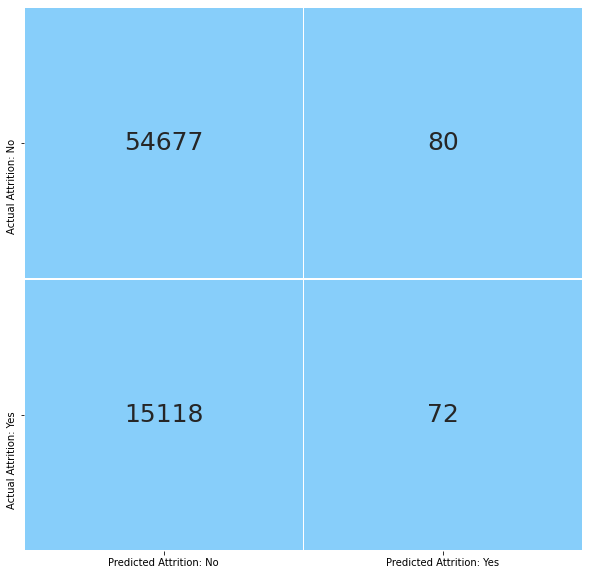

In [112]:
cm=confusion_matrix(ytest,predictedlr)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted Attrition: No',
                                            'Predicted Attrition: Yes'],
                          index=['Actual Attrition: No',
                                'Actual Attrition: Yes'])
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap = matplotlib.colors.ListedColormap('lightskyblue'),cbar=False,
            linewidths = 0.1,annot_kws={'size':25})

plt.show()


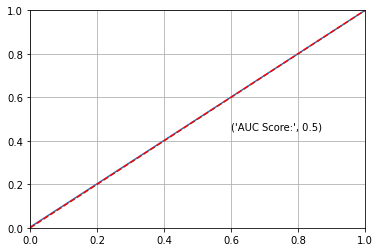

In [113]:
fpr1, tpr1, thresholds1 = roc_curve(ytest,predictedlr)
plt.plot(fpr1, tpr1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.text(x=0.6,y=0.45,s=('AUC Score:',round(metrics.roc_auc_score(ytest,predictedlr),2)))
plt.grid(True)

In [114]:
ROC = pd.DataFrame({'FPR':fpr1, 'TPR':tpr1, 'Thresholds':thresholds1})
ROC['Difference'] = ROC['TPR']-ROC['FPR']
ROC.sort_values(by='Difference', ascending=False).head()

,FPR,TPR,Thresholds,Difference
1,0.001461,0.00474,1,0.003279
0,0.000000,0.00000,2,0.000000
2,1.000000,1.00000,0,0.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
dt.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(dt.score(Xtrain,ytrain))
print("Testing Accuracy")
print(dt.score(scaledXtest,ytest))
scoresdt = cross_val_score(dt, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresdt))
predicted_dt = dt.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_dt))
print(classification_report(ytest,predicted_dt))

In [ ]:
cm=confusion_matrix(ytest,predicted_dt)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted Attrition: No',
                                            'Predicted Attrition: Yes'],
                          index=['Actual Attrition: No',
                                'Actual Attrition: Yes'])
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap = matplotlib.colors.ListedColormap('lightskyblue'),cbar=False,
            linewidths = 0.1,annot_kws={'size':25})

plt.show()


In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(ytest,predicted_dt)
plt.plot(fpr2, tpr2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.text(x=0.6,y=0.45,s=('AUC Score:',round(metrics.roc_auc_score(ytest,predicted_dt),2)))
plt.grid(True)

In [ ]:
ROC = pd.DataFrame({'FPR':fpr2, 'TPR':tpr2, 'Thresholds':thresholds2})
ROC['Difference'] = ROC['TPR']-ROC['FPR']
ROC.sort_values(by='Difference', ascending=False).head()

In [ ]:
rf = RandomForestClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
rf.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(rf.score(Xtrain,ytrain))
print("Testing Accuracy")
print(rf.score(scaledXtest,ytest))
scoresrf = cross_val_score(rf, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresrf))
predicted_rf = rf.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_rf))
print(classification_report(ytest,predicted_rf))

In [ ]:
cm=confusion_matrix(ytest,predicted_rf)

conf_matrix = pd.DataFrame(data =cm,columns=['Predicted Attrition: No',
                                            'Predicted Attrition: Yes'],
                          index=['Actual Attrition: No',
                                'Actual Attrition: Yes'])
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap = matplotlib.colors.ListedColormap('lightskyblue'),cbar=False,
            linewidths = 0.1,annot_kws={'size':25})

plt.show()


In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(ytest,predicted_rf)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.text(x=0.6,y=0.45,s=('AUC Score:',round(metrics.roc_auc_score(ytest,predicted_rf),2)))
plt.grid(True)

In [ ]:
ROC = pd.DataFrame({'FPR':fpr3, 'TPR':tpr3, 'Thresholds3':thresholds3})
ROC['Difference'] = ROC['TPR']-ROC['FPR']
ROC.sort_values(by='Difference', ascending=False).head()